In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.svm import  SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline


D:\python\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:

#数据加载
data = pd.read_csv('./UCI_Credit_Card.csv')
# print(data.shape)
# print(data.describe())

next_month = data['default.payment.next.month'].value_counts()
# print(next_month)

df = pd.DataFrame({'default.payment.next.month':next_month.index,'values':next_month.values})
# print(df)


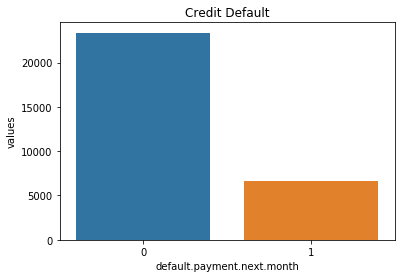

In [4]:
#显示违约标签数据分布
plt.title('Credit Default')
sns.barplot(x='default.payment.next.month',y='values',data=df)
plt.show()

In [5]:
#元数据中ID字段对预测业务没有实际意义，这里去掉
data.drop(['ID'],inplace=True,axis=1)

#标签
target = data['default.payment.next.month'].values

columns = data.columns.tolist()
print(columns)

#将标签列名去除
columns.remove('default.payment.next.month')

features = data[columns].values
print(features)

['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'default.payment.next.month']
[[2.0000e+04 2.0000e+00 2.0000e+00 ... 0.0000e+00 0.0000e+00 0.0000e+00]
 [1.2000e+05 2.0000e+00 2.0000e+00 ... 1.0000e+03 0.0000e+00 2.0000e+03]
 [9.0000e+04 2.0000e+00 2.0000e+00 ... 1.0000e+03 1.0000e+03 5.0000e+03]
 ...
 [3.0000e+04 1.0000e+00 2.0000e+00 ... 4.2000e+03 2.0000e+03 3.1000e+03]
 [8.0000e+04 1.0000e+00 3.0000e+00 ... 1.9260e+03 5.2964e+04 1.8040e+03]
 [5.0000e+04 1.0000e+00 2.0000e+00 ... 1.0000e+03 1.0000e+03 1.0000e+03]]


In [6]:
#将元数据30%作为训练集
from sklearn.model_selection import train_test_split

train_x,test_x,train_y,test_y = train_test_split(features,target,test_size=0.3)
print(train_x.shape)
print(train_y.shape)
print(test_x.shape)
print(test_y.shape)

(21000, 23)
(21000,)
(9000, 23)
(9000,)


In [7]:
#构造各种分类器
classifiers = [
    SVC(),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    KNeighborsClassifier()
]
#分类器名称
classifier_names = [
    'svc',
    'decisiontreeclassifier',
    'randomforestclassifier',
    'kneighborsclassifier'
]

# 分类器参数
classifier_param_grid = [
            {'svc__C':[1], 'svc__gamma':[0.01]},
            {'decisiontreeclassifier__max_depth':[6,9,11]},
            {'randomforestclassifier__n_estimators':[3,5,6]} ,
            {'kneighborsclassifier__n_neighbors':[4,6,8]},
]

#对具体的分类器进行GridSearchCV参数调优
def GridSearchCV_work(pipeline, train_x, train_y, test_x, test_y, model_param_grid, score='accuracy'):
    gridsearch = GridSearchCV(estimator=pipeline,param_grid=model_param_grid,scoring=score)
    #寻找最优参数  和 最优的准确率分数
    search = gridsearch.fit(train_x,train_y)
    print('GridSearchCV最优参数：',search.best_params_)
    print('GridSearchCV最优分数：',search.best_score_)
    predict_y = search.predict(test_x)
    print('准确率%0.4lf' %accuracy_score(test_y,predict_y))

    response = {}
    response['predict_y'] = predict_y
    response['accuracy_score'] = accuracy_score(test_y,predict_y)
    return  response


for model, model_name, model_param_grid in zip(classifiers, classifier_names, classifier_param_grid):
    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        (model_name, model)
    ])
    result = GridSearchCV_work(pipeline, train_x, train_y, test_x, test_y, model_param_grid, score='accuracy')


GridSearchCV最优参数： {'svc__C': 1, 'svc__gamma': 0.01}
GridSearchCV最优分数： 0.816952380952381
准确率0.8164
GridSearchCV最优参数： {'decisiontreeclassifier__max_depth': 6}
GridSearchCV最优分数： 0.8185238095238097
准确率0.8191
GridSearchCV最优参数： {'randomforestclassifier__n_estimators': 6}
GridSearchCV最优分数： 0.795047619047619
准确率0.8010
GridSearchCV最优参数： {'kneighborsclassifier__n_neighbors': 8}
GridSearchCV最优分数： 0.8033333333333333
准确率0.8028
